In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [3]:
# reading the train data
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# display the info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# displaying categorical and numerical columns
categorical_columns = df_train.select_dtypes(exclude='number').columns.tolist()
print("Categorical Columns \n")
print(categorical_columns)

numerical_columns = df_train.select_dtypes(include='number').columns.tolist()
print("\nNumerical Columns \n")
print(numerical_columns)

Categorical Columns 

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Numerical Columns 

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', '

In [6]:
# displaying number of rows and columns
df_train.shape

(1460, 81)

In [7]:
any(df_train.duplicated(keep='first'))

False

There are no duplicate rows

##### missing value treatment in train data

In [8]:
# columns with missing values in train data set
pd.set_option('display.max_rows', 100)
round(100 * (df_train.isna().sum(axis=0)/len(df_train.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [9]:
# imputting 'NaN' values in Alley column with 'None' value which represent no alley access
df_train.Alley.fillna(value='None', inplace=True)
# imputting 'NaN' values in FireplaceQu column with 'None' value which represent no fire place
df_train.FireplaceQu.fillna(value='None', inplace=True)
# imputting 'NaN' values in PoolQC column with 'None' value which represent no pool
df_train.PoolQC.fillna(value='None', inplace=True)
# imputting 'NaN' values in Fence column with 'None' value which represent no fence
df_train.Fence.fillna(value='None', inplace=True)
# imputting 'NaN' values in MiscFeature column with 'None' value which represent no miscellaneous feature
df_train.MiscFeature.fillna(value='None', inplace=True)

In [10]:
# imputting the 'LotFrontage' column with its median value
df_train.LotFrontage.fillna(value=df_train.LotFrontage.median(), inplace=True)

# imputting 'Electrical' column with mode value i.e 'SBrkr'
df_train.Electrical.fillna(value=df_train.Electrical.mode()[0], inplace=True)

# imputting 'MasVnrType' column with 'None' value
df_train.MasVnrType.fillna(value='None', inplace=True)
# imputting 'MasVnrType' column with '0' value
df_train.MasVnrArea.fillna(value=0, inplace=True)

In [11]:
# imputting 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual' and 'GarageCond' with 'None' values
# Because 'NA' value means there is No Garage so replacing "NA" with 'None' value
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_train[col] = df_train[col].fillna(value='None')
    
# also, imputting 'GarageYrBlt' column with 0 value to indicate there is No Garage Built
df_train.GarageYrBlt.fillna(value=0, inplace=True)
    
# imputting 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' with 'None' values
# Because 'NA' value means there is No Basement so replacing "NA" with 'None' value
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df_train[col] = df_train[col].fillna(value='None')

In [12]:
# columns with missing values
pd.set_option('display.max_rows', 100)
round(100 * (df_train.isna().sum(axis=0)/len(df_train.index)), 2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

As we can see,there are no missing values

##### Deriving new features

In [13]:
# let us  derive a new feature 'House_Age' which is difference between current year and Year built
currentYear = 2020
df_train['House_Age'] = currentYear - df_train.YearBuilt
# 'Garage_Age' which is difference between current year and Garage Year built.If there is no garage then take its value as zero
df_train['Garage_Age'] = df_train.GarageYrBlt.apply(lambda x : 0 if x==0 else currentYear - x)

## Visualization

### Univariate Analysis

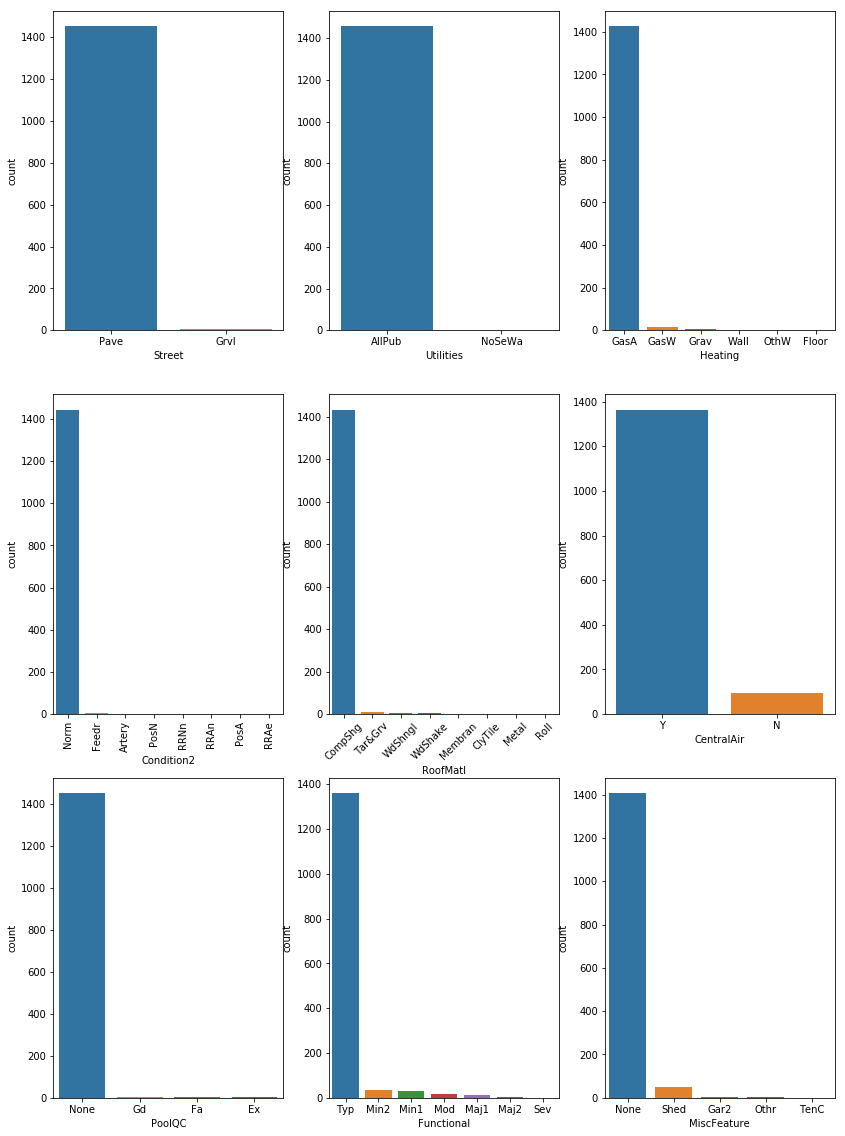

In [14]:
plt.figure(figsize=(14,20))

plt.subplot(3,3,1)
# plotting countplot of 'Street' column
sns.countplot(df_train['Street'], order = df_train['Street'].value_counts().index)

plt.subplot(3,3,2)
# plotting countplot of 'Utilities' column
sns.countplot(df_train['Utilities'], order = df_train['Utilities'].value_counts().index)

plt.subplot(3,3,3)
# plotting countplot of 'Heating' column
sns.countplot(df_train['Heating'], order = df_train['Heating'].value_counts().index)

plt.subplot(3,3,4)
# plotting countplot of 'Condition2' column
sns.countplot(df_train['Condition2'], order = df_train['Condition2'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
# plotting countplot of 'RoofMatl' column
sns.countplot(df_train['RoofMatl'], order = df_train['RoofMatl'].value_counts().index)
plt.xticks(rotation=45)

plt.subplot(3,3,6)
# plotting countplot of 'CentralAir' column
sns.countplot(df_train['CentralAir'], order = df_train['CentralAir'].value_counts().index)

plt.subplot(3,3,7)
# plotting countplot of 'PoolQC' column
sns.countplot(df_train['PoolQC'], order = df_train['PoolQC'].value_counts().index)

plt.subplot(3,3,8)
# plotting countplot of 'Functional' column
sns.countplot(df_train['Functional'], order = df_train['Functional'].value_counts().index)


plt.subplot(3,3,9)
# plotting countplot of 'MiscFeature' column
sns.countplot(df_train['MiscFeature'], order = df_train['MiscFeature'].value_counts().index)


plt.show()

As we can see from the above plots, we can drop `Street`, `Utilities`, `Heating`, `CentralAir`, `Condition2`,`PoolQC`, `Functional`, `MiscFeature` and  `RoofMatl` as `98%` of the values are redundant

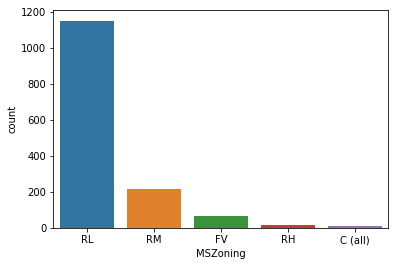

In [15]:
# plotting countplot of 'MSZoning' column
plt.figure(figsize=(6,4))
sns.countplot(df_train['MSZoning'], order = df_train['MSZoning'].value_counts().index)
plt.show()

From the graph, the most of the houses which are classified for the sale belongs to `Residential Low Density (RL)` zoning.

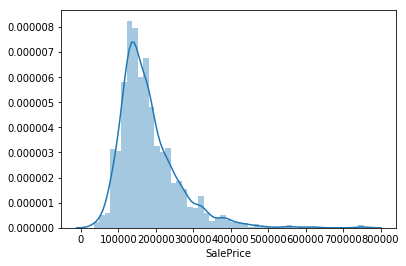

In [16]:
# histpot of the sale price column
sns.distplot(df_train['SalePrice'])
plt.show()

As we can  see, `sale price` is slightly positively skewed. It is slightly deviated from normal distribution

### Bivariate Analysis

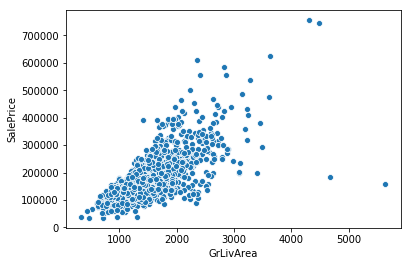

In [17]:
# scatter plot between 'SalePrice' and 'GrLivArea'
sns.scatterplot(data=df_train, y='SalePrice', x='GrLivArea')
plt.show()

As we can see, `SalePrice` and `GrLivArea` are positively correlated. This means, `bigger` the ground living area `higher` the sale price. 

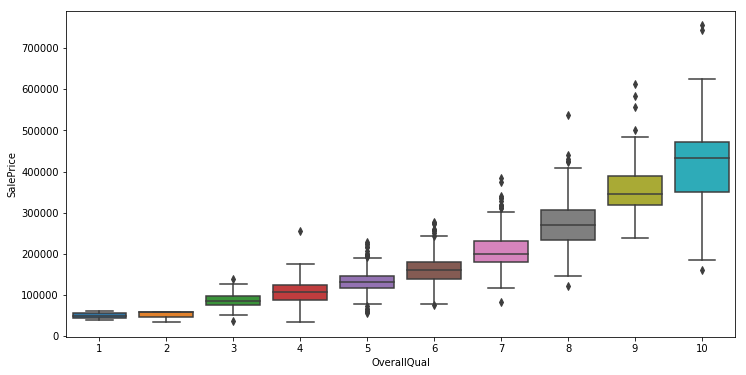

In [18]:
# scatter plot between 'SalePrice' and 'GrLivArea'
plt.figure(figsize=(12,6))
sns.boxplot(data=df_train, y='SalePrice', x='OverallQual')
plt.show()

The median `SalePrice` can be seen increasing as the `OverallQual` increases. 

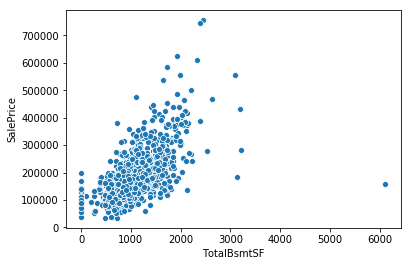

In [19]:
# scatter plot between 'SalePrice' and 'TotalBsmtSF'
sns.scatterplot(data=df_train, y='SalePrice', x='TotalBsmtSF')
plt.show()

There is a positive correlation between `SalePrice` and `TotalBsmtSF`

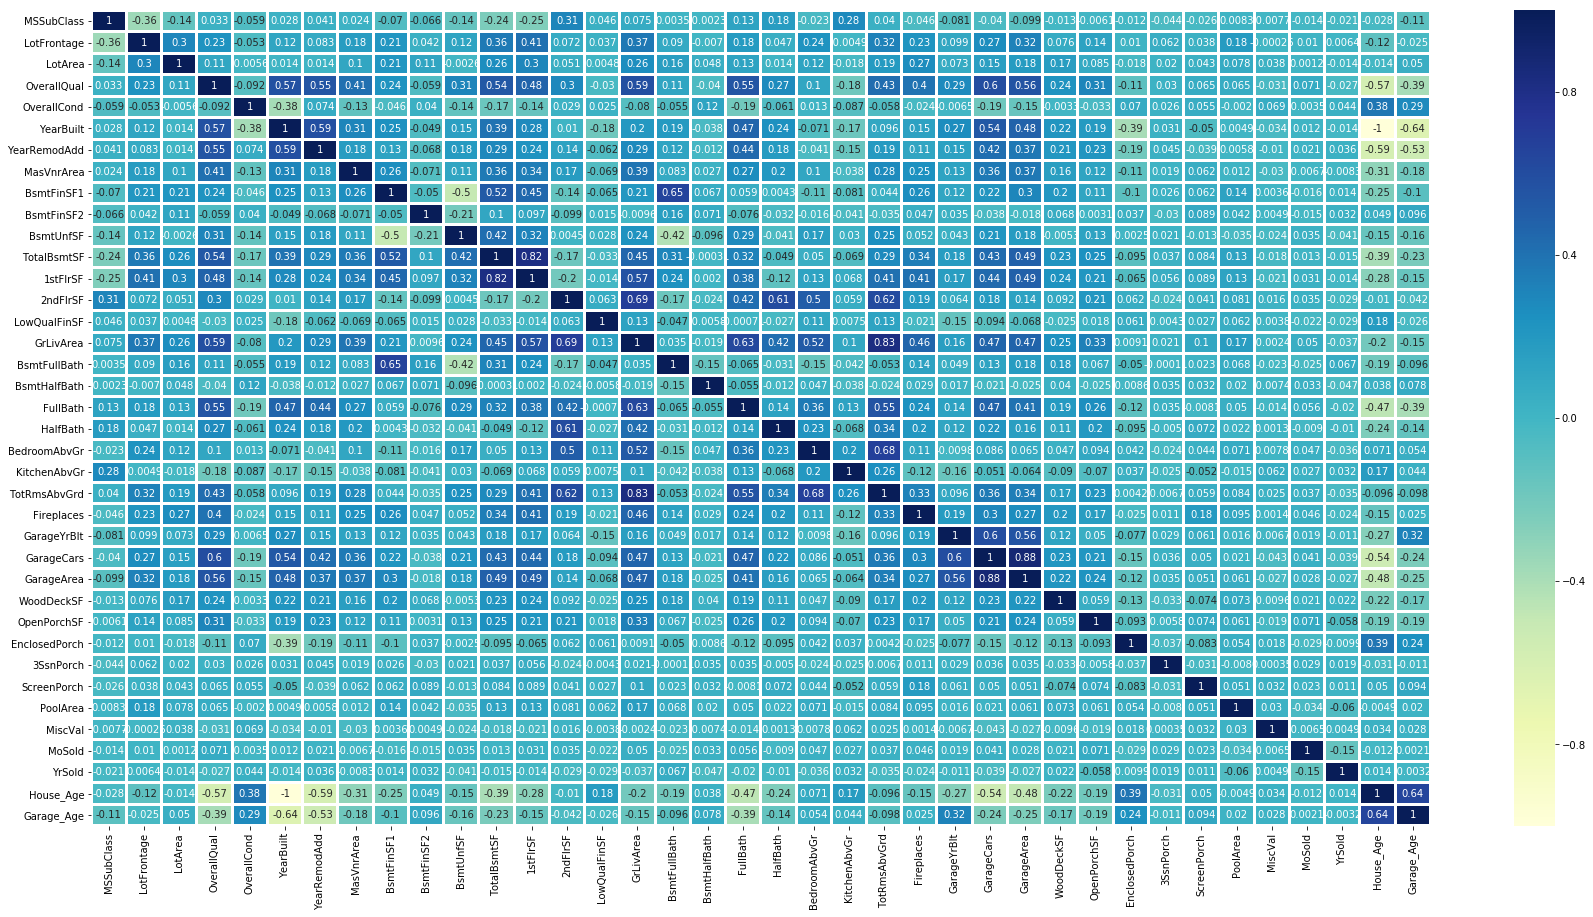

In [20]:
# plotting heatmap to find the correlation between the variables
plt.figure(figsize=(30,15))
numerical_columns = df_train.select_dtypes(include='number').columns.tolist()
# removing Id and 'SalePrice' column from numerical_column list
numerical_columns.remove('Id')
numerical_columns.remove('SalePrice')
sns.heatmap(df_train[numerical_columns].corr(), annot=True, cmap="YlGnBu",linewidths=2.0)
plt.show()

From the heatmpa, we can see that:

- `GrLivArea` and `TotRmsAbvGrid` have a positive corrleation of 0.83
- `GarageCars` and `GarageArea` have a positive correlation of 0.88
- `OpenPorchSF` and `EnclosedPorch` have a negative correlation of -0.093

In [21]:
# now we are going to drop the columns which have redundant values as we identified in visualization
df_train.drop(columns = [
    'Street',
    'Utilities',
    'Heating',
    'CentralAir',
    'Condition2',
    'PoolQC',
    'Functional',
    'MiscFeature',
    'RoofMatl',
    'MoSold',
    'YrSold',
    'YearRemodAdd',
    'YearBuilt',
    'GarageYrBlt'
], inplace=True)

## Data Preparation

##### encoding categorical columns

In [22]:
# there are ordinal variables which have to be converted to numeric variable
def ordinal_to_numeric(x):
    if x.upper() == "GLQ":
        return 6
    elif x.upper() == "EX" or x.upper() == "ALQ":
        return 5
    elif x.upper() == "GD" or x.upper() == "BLQ":
        return 4
    elif x.upper() == "TA" or x.upper() == "REC" or x.upper() == "AV":
        return 3
    elif x.upper() == "FA" or x.upper() == "LWQ" or x.upper() == "MN":
        return 2
    elif x.upper() == "PO" or x.upper() == "UNF" or x.upper() == "NO":
        return 1
    elif x.upper() == "NONE":
        return 0

In [23]:
# converting ordinal columns  to numeric
for col in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
            'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']:
    df_train[col] = df_train[col].apply(ordinal_to_numeric)

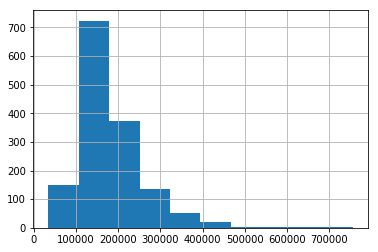

In [24]:
# visualizing the saleprice column
df_train.SalePrice.hist()
plt.show()

As we can see, `SalePrice` column is `right/postively skewed`. We will apply `log transform` and make it normally distributed.<br>
Also, we will calculate the skewness of the numerical column and apply log trnaformation on right/positively skewed column

##### log transformation of positively skewed sale price column

In [25]:
# applying log transformation on SalePrice column
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

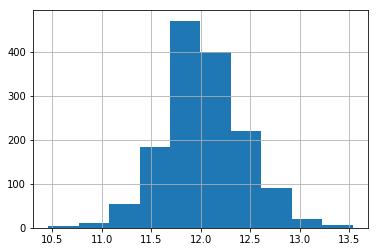

In [26]:
# 'SalePrice' column distribution after applying log transformation
df_train.SalePrice.hist()
plt.show()

As we can see, `SalePrice` column is `normally distributed` after log transformation

##### dummy variable creation of categorical columns

In [27]:
# creating dummy variables for categorical columns
categorical_columns = df_train.select_dtypes(exclude='number').columns.tolist()
numerical_columns = df_train.select_dtypes(include='number').columns.tolist()
df_dummies = pd.get_dummies(columns=categorical_columns, drop_first=True, data=df_train[categorical_columns])
# Add the df_dummies dataframe to the df dataframe
df_train = pd.concat([df_train, df_dummies], axis = 1)
# dropping the categorical columns for which dummy variables are created
df_train.drop(columns=categorical_columns,axis=1, inplace=True)
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,196.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,0.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,162.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,0.0,3,3,3,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,350.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0


## Modelling

In [28]:
# putting features in X and y variables
X_train = df_train.drop(columns=['SalePrice','Id'], axis=1)
y_train = df_train.SalePrice

### Feature Scaling

In [29]:
# removing 'SalePrice' column
numerical_columns.remove('SalePrice')
numerical_columns.remove('Id')
# define standard scaler
scaler = StandardScaler()
# fit and transform the numerical columns
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

### Ridge Regression

In [30]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
grid_search_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
grid_search_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [31]:
# displaying the CV results
cv_results = pd.DataFrame(grid_search_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.029877,0.034400,0.001757,3.904351e-04,0.0001,{'alpha': 0.0001},-0.092059,-0.101228,-0.100172,-0.093428,...,-0.096804,0.003604,27,-0.080356,-0.076422,-0.078500,-0.080361,-0.072630,-0.077654,0.002902
1,0.011913,0.000731,0.001756,3.905776e-04,0.001,{'alpha': 0.001},-0.092028,-0.101224,-0.100161,-0.093424,...,-0.096793,0.003610,26,-0.080353,-0.076423,-0.078501,-0.080361,-0.072630,-0.077654,0.002901
2,0.011717,0.001747,0.001561,4.782799e-04,0.01,{'alpha': 0.01},-0.091751,-0.101188,-0.100058,-0.093382,...,-0.096694,0.003663,25,-0.080330,-0.076425,-0.078504,-0.080361,-0.072629,-0.077650,0.002897
3,0.010933,0.001139,0.001951,6.177847e-04,0.05,{'alpha': 0.05},-0.090991,-0.101036,-0.099625,-0.093208,...,-0.096363,0.003785,23,-0.080266,-0.076437,-0.078512,-0.080362,-0.072648,-0.077645,0.002879
4,0.011132,0.000479,0.001952,7.629395e-07,0.1,{'alpha': 0.1},-0.090542,-0.100863,-0.099155,-0.093018,...,-0.096078,0.003819,22,-0.080249,-0.076450,-0.078520,-0.080381,-0.072681,-0.077656,0.002867


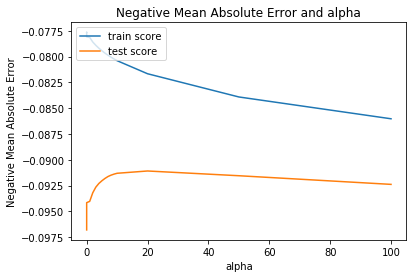

{'alpha': 20}


In [32]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting alpha v/s mean train score values
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
# plotting alpha v/s mean test score values
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
# setting x-label, y-label and title of the graph
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()
# printing the best param value
print(grid_search_cv.best_params_)

From the graph, as we can see the absolute error increases with increase in alpha.<br>
So, we are taking the `cut-off alpha value as 20` from the graph

In [33]:
# fitting ridge regression with alpha value as 20
ridge_model = Ridge(alpha=20)
ridge_model.fit(X_train, y_train)
# printing the co-efficients
print(ridge_model.coef_)

[-0.02353977 -0.00753445  0.01720156  0.08463151  0.04955147  0.00182831
  0.00238515 -0.00324889  0.01931511  0.0018493   0.01846244  0.02090009
  0.0011556  -0.00728669  0.00697163 -0.00167598  0.00207695  0.01533079
  0.03673344  0.03428005  0.00336123  0.05581244  0.02322772  0.0019951
  0.02143258  0.01752672  0.00890558 -0.00514606  0.01820801  0.02243263
  0.0075837   0.01877757  0.03921025  0.00472389  0.01755613  0.00081432
  0.01245862  0.00072398  0.00988795  0.00643821  0.01585105 -0.00558612
 -0.0026209  -0.04095247  0.0026334   0.04585504  0.02754754  0.05759878
  0.0047367  -0.00591832  0.01191959  0.02259723 -0.03429048  0.0019749
  0.03025234  0.01904184  0.03214955  0.02817993 -0.02184612 -0.00979997
 -0.01282754  0.01721809 -0.01325376 -0.00497213 -0.00875308  0.0190219
  0.03205041 -0.0160996   0.0841686  -0.05931374 -0.02724691 -0.06302472
 -0.044518   -0.01896827 -0.01081056 -0.00401943 -0.02440927  0.04075136
  0.07200408 -0.02579255 -0.00789556 -0.01016352 -0.00

In [34]:
# predicting on train data
y_train_pred_ridge = ridge_model.predict(X_train)
# finding the r2 and mean squared error score on train data
print("r2 score {0}".format(r2_score(y_true=y_train, y_pred=y_train_pred_ridge)))
print("mean squared error {0}".format(mean_squared_error(y_true=y_train, y_pred=y_train_pred_ridge)))

r2 score 0.9069870362571314
mean squared error 0.01483095748080182


We have got `r2-score` of `0.90` and `mean squared error` of `0.014` on the train data

## Lasso Regression

In [35]:
# tunning alpha values for lasso regression
lasso = Lasso()
# cross validation
grid_search_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

grid_search_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [36]:
# displaying the CV results
cv_results = pd.DataFrame(grid_search_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.486214,0.055694,0.001368,0.000478,0.0001,{'alpha': 0.0001},-0.086828,-0.098246,-0.093925,-0.089583,...,-0.092658,0.004012,2,-0.080738,-0.077019,-0.079258,-0.080868,-0.073287,-0.078234,0.002836
1,0.070494,0.006464,0.001557,0.000476,0.001,{'alpha': 0.001},-0.088412,-0.095856,-0.088531,-0.086317,...,-0.089991,0.003263,1,-0.085517,-0.082254,-0.084805,-0.085840,-0.078510,-0.083385,0.002743
2,0.022067,0.002189,0.001370,0.000483,0.01,{'alpha': 0.01},-0.097541,-0.105308,-0.097934,-0.094947,...,-0.098989,0.003451,3,-0.098900,-0.095162,-0.098325,-0.098965,-0.090133,-0.096297,0.003385
3,0.015241,0.000480,0.001360,0.000470,0.05,{'alpha': 0.05},-0.122225,-0.135730,-0.128768,-0.121134,...,-0.125924,0.005625,4,-0.127117,-0.123827,-0.127732,-0.125151,-0.118721,-0.124510,0.003211
4,0.012894,0.000951,0.001369,0.000481,0.1,{'alpha': 0.1},-0.158447,-0.177558,-0.164866,-0.147476,...,-0.160491,0.010244,5,-0.161056,-0.158942,-0.162224,-0.159951,-0.154945,-0.159424,0.002493


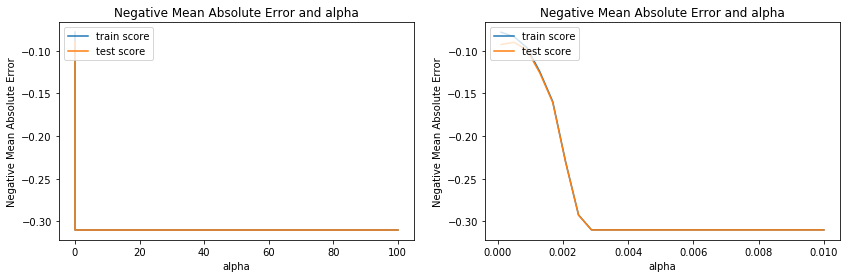

{'alpha': 0.001}


In [37]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(14,4))
# plotting subplot
plt.subplot(1,2,1)
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
# setting x-label, y-label and title of the graph
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')

# plotting above graph with different scale to visualize the data better
plt.subplot(1,2,2)
# setting different scale for alpha values
plt.plot(np.linspace(0.0001, 0.01,26), cv_results['mean_train_score'])
plt.plot(np.linspace(0.0001, 0.01,26), cv_results['mean_test_score'])
# setting x-label, y-label and title of the graph
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()
# printing the best param value
print(grid_search_cv.best_params_)

From the graph, we are taking the `cut-off alpha value as 0.001`.

In [38]:
# fitting lasso model on train data
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X=X_train, y=y_train)
# printing the co-efficient
print(lasso_model.coef_)

[-2.57993993e-02 -5.20227826e-03  1.69300069e-02  8.89361596e-02
  5.00387274e-02  1.38840357e-03  1.75035942e-03 -1.11733701e-03
  1.85555297e-02  0.00000000e+00  1.90176223e-02  2.09631724e-02
  1.12421149e-03 -6.64293460e-04  1.84325742e-03 -0.00000000e+00
  6.15042007e-04  1.58803591e-02  1.52068532e-02  0.00000000e+00
  0.00000000e+00  9.66686019e-02  2.39870917e-02  1.69889384e-03
  1.76031812e-02  1.30964645e-02  7.87537741e-03 -8.51569743e-05
  1.65409143e-02  1.74876190e-02  6.25921136e-03  1.87635357e-02
  4.11161713e-02  2.17637990e-03  1.09331354e-02  0.00000000e+00
  1.19199981e-02  5.92640669e-04  7.29432804e-03  4.48496623e-03
  1.67632597e-02 -5.65298323e-03 -1.03721489e-03 -5.01371537e-02
 -0.00000000e+00  3.73407791e-02  0.00000000e+00  6.13911081e-02
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.29042969e-03  2.51414469e-02 -0.00000000e+00 -0.00000000e+00
 -4.81163916e-03  0.00000

In [39]:
# predicting on train data
y_train_pred_lasso = lasso_model.predict(X_train)
# finding the r2 and mean squared error score on train data
print("r2 score {0}".format(r2_score(y_true=y_train, y_pred=y_train_pred_lasso)))
print("mean squared error {0}".format(mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso)))

r2 score 0.9000266062465718
mean squared error 0.015940801070132883


We have got `r2-score` of `0.90` and `mean squared error` of `0.015` on the train data

We found optimal value of `alpha for ridge regression is 20` and for `lasso regression is 0.001`.

- Between `ridge and lasso regression`, we will choose `lasso` regression with optimal alpha value of `0.001`. This is beacuse most of the co-efficients will become zero for less important features there by reducing model complexity.

### Feature Selection

In [40]:
# finding important features from lasso regression
lasso_features = pd.DataFrame({'features':X_train.columns.tolist(), 'co-efficients': lasso_model.coef_})
# top 5 important features from lasso regression
lasso_features.sort_values(by='co-efficients', ascending=False).head()

,features,co-efficients
21,GrLivArea,0.096669
68,Neighborhood_Crawfor,0.094556
3,OverallQual,0.088936
78,Neighborhood_NridgHt,0.080481
84,Neighborhood_StoneBr,0.070543


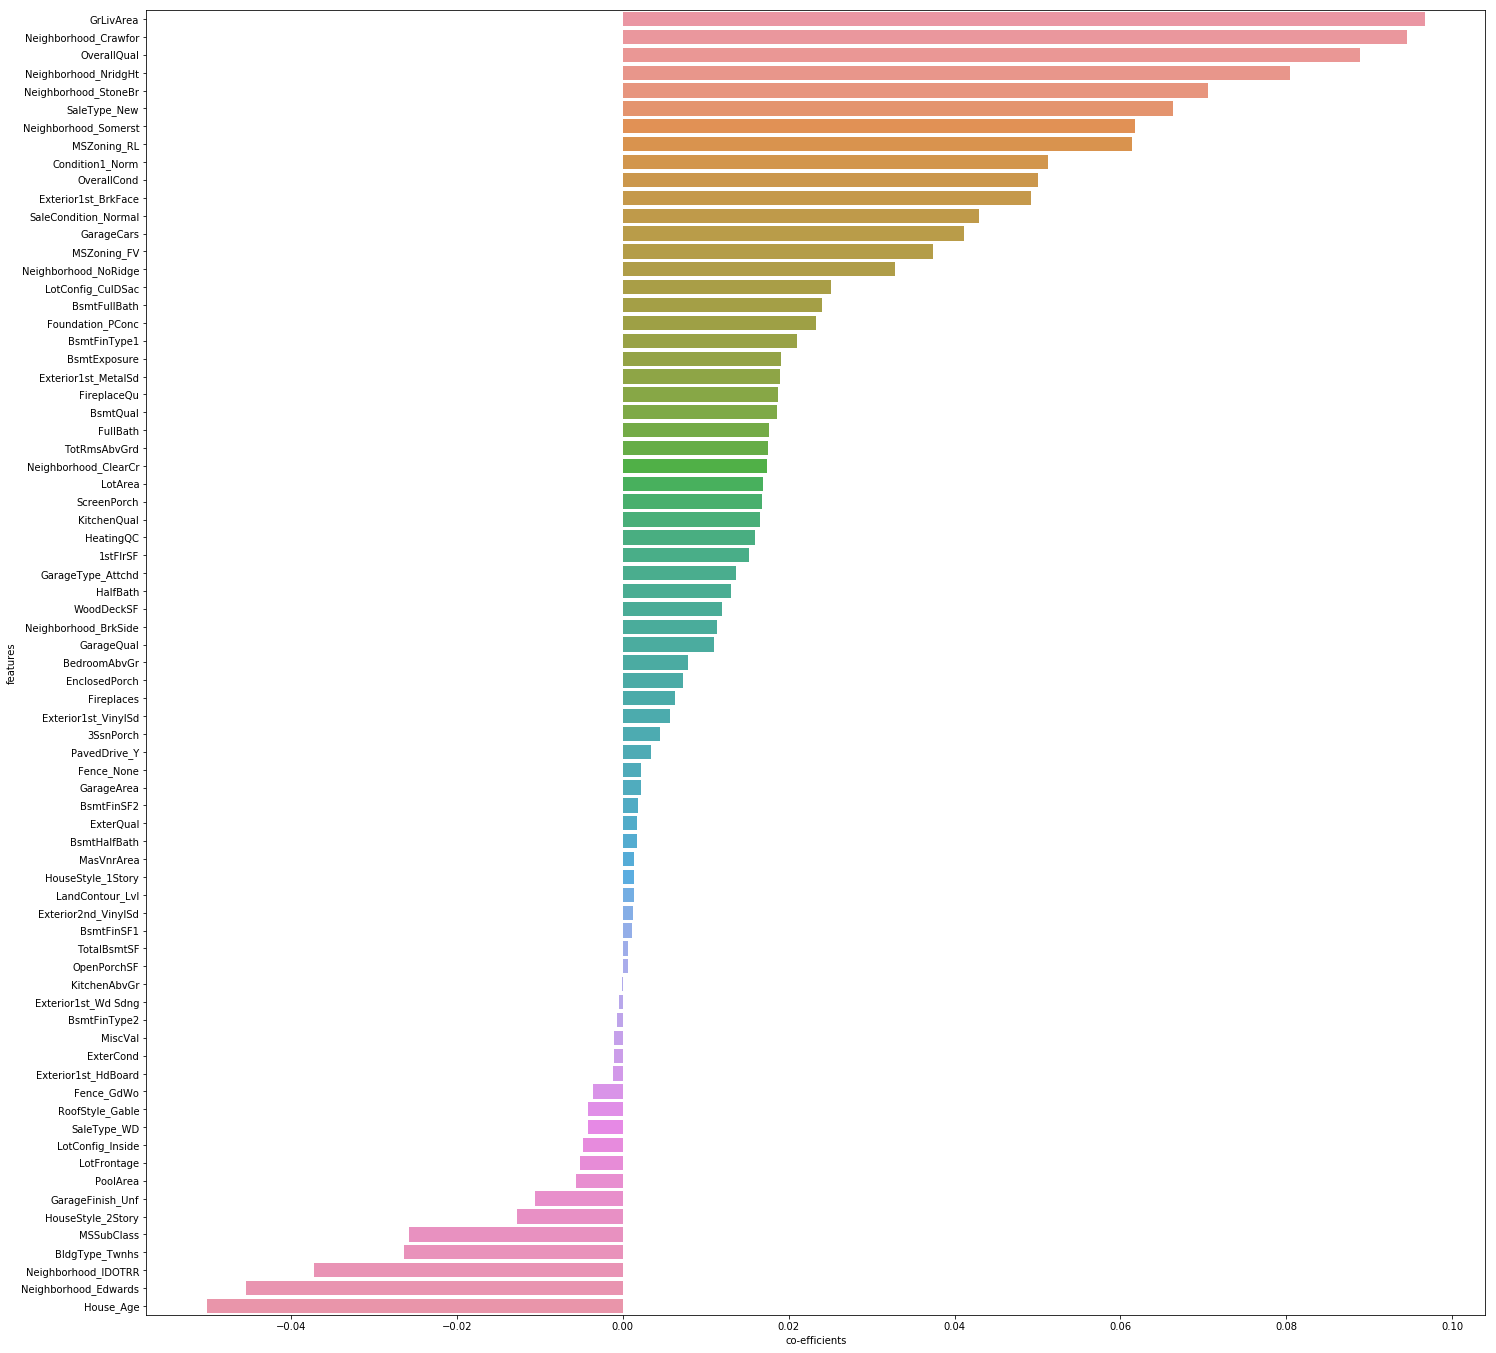

In [41]:
# plotting top features of lasso regression
plt.figure(figsize=(24,24))
# ordering the features by descending order and removing co-efficients with zero value
features = lasso_features[lasso_features['co-efficients']!=0].sort_values(by='co-efficients', ascending=False)
sns.barplot(x = 'co-efficients', y='features', data=features)
plt.show()

- Top 5 important predictor variables are `OverallQual, GrLivArea, Neighborhood_Crawfor, Neighborhood_NridgHt and Neighborhood_StoneBr`. These predictor variables have positive impact on the dependent variable `SalePrice`.
- Also from the above graph, `House_Age` has negative impact on the dependent variable `SalePrice`. This means `House_Age` increases then `SalePrice` decreases.

### Model Validation

In [42]:
# reading the test data
df_test = pd.read_csv('./data/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [43]:
# also, imputting 'GarageYrBlt' column with 0 value to indicate there is No Garage Built
df_test.GarageYrBlt.fillna(value=0, inplace=True)
# let us  derive a new feature 'House_Age' which is difference between current year and Year built
currentYear = 2020
df_test['House_Age'] = currentYear - df_test.YearBuilt
# 'Garage_Age' which is difference between current year and Garage Year built.If there is no garage then take its value as zero
df_test['Garage_Age'] = df_test.GarageYrBlt.apply(lambda x : 0 if x==0 else currentYear - x)

In [44]:
# dropping columns which are not included in the train dataset
# now we are going to drop the columns which have redundant values as we identified in visualization
df_test.drop(columns = [
    'Street',
    'Utilities',
    'Heating',
    'CentralAir',
    'Condition2',
    'PoolQC',
    'Functional',
    'MiscFeature',
    'RoofMatl',
    'MoSold',
    'YrSold',
    'YearRemodAdd',
    'YearBuilt',
    'GarageYrBlt'
], inplace=True)

##### missing value treatment on test data


In [45]:
# columns with missing values in test data set
pd.set_option('display.max_rows', 100)
round(100 * (df_test.isna().sum(axis=0)/len(df_test.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.27
LotFrontage      15.56
LotArea           0.00
Alley            92.67
LotShape          0.00
LandContour       0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
RoofStyle         0.00
Exterior1st       0.07
Exterior2nd       0.07
MasVnrType        1.10
MasVnrArea        1.03
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          3.02
BsmtCond          3.08
BsmtExposure      3.02
BsmtFinType1      2.88
BsmtFinSF1        0.07
BsmtFinType2      2.88
BsmtFinSF2        0.07
BsmtUnfSF         0.07
TotalBsmtSF       0.07
HeatingQC         0.00
Electrical        0.00
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.14
BsmtHalfBath      0.14
FullBath          0.00
HalfBath          0.00
BedroomAbvG

In [46]:
# imputting 'NaN' values in Alley column with 'None' value which represent no alley access
df_test.Alley.fillna(value='None', inplace=True)
# imputting 'NaN' values in FireplaceQu column with 'None' value which represent no fire place
df_test.FireplaceQu.fillna(value='None', inplace=True)
# imputting 'NA' values in MSZoning column with 'RL' value which represent residential low density and which is the mode value
df_test.MSZoning.fillna(value='RL', inplace=True)
# imputting 'NaN' values in Fence column with 'None' value which represent no fence
df_test.Fence.fillna(value='None', inplace=True)
# imputting 'NA' values in Exterior1st and Exterior2nd column with 'Other' value
df_test.Exterior1st.fillna(value='Other', inplace=True)
df_test.Exterior2nd.fillna(value='Other', inplace=True)
# imputting 'NA' value in SaleType column with 'Oth' value indicating Other
df_test.SaleType.fillna(value='Oth', inplace=True)

In [47]:
# imputting the 'LotFrontage' column with its median value
df_test.LotFrontage.fillna(value=df_test.LotFrontage.median(), inplace=True)

# imputting 'Electrical' column with mode value i.e 'SBrkr'
df_test.Electrical.fillna(value=df_test.Electrical.mode()[0], inplace=True)

# imputting 'MasVnrType' column with 'None' value
df_test.MasVnrType.fillna(value='None', inplace=True)
# imputting 'MasVnrType' column with '0' value
df_test.MasVnrArea.fillna(value=0, inplace=True)
# imputting 'NA' value in 'BsmtFinSF1' and 'BsmtFinSF2' column to 0(indicates type1 and type 2 finished square feet is zero )
df_test.BsmtFinSF1.fillna(value = 0, inplace=True)
df_test.BsmtFinSF2.fillna(value = 0, inplace=True)
df_test.BsmtUnfSF.fillna(value = 0, inplace=True)
df_test.TotalBsmtSF.fillna(value = 0, inplace=True)
df_test.BsmtFullBath.fillna(value = 0, inplace=True)
df_test.BsmtHalfBath.fillna(value = 0, inplace=True)
# imputting 'NA' values in 'KitchenQual' column with None
df_test.KitchenQual.fillna(value='None', inplace=True)
# imputting 'NA' values in 'GarageCars' and 'GarageArea' with value 0
df_test.GarageCars.fillna(value=0, inplace=True)
df_test.GarageArea.fillna(value=0, inplace=True)

In [48]:
# imputting 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual' and 'GarageCond' with 'None' values
# Because 'NA' value means there is No Garage so replacing "NA" with 'None' value
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_test[col] = df_test[col].fillna(value='None')
    
# imputting 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' with 'None' values
# Because 'NA' value means there is No Basement so replacing "NA" with 'None' value
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df_test[col] = df_test[col].fillna(value='None')

In [49]:
# columns with missing values in test data set
pd.set_option('display.max_rows', 100)
round(100 * (df_test.isna().sum(axis=0)/len(df_test.index)), 2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces   

Now there are no missing values

In [50]:
# converting ordinal columns  to numeric
for col in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
            'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']:
    df_test[col] = df_test[col].apply(ordinal_to_numeric)

##### dummy variable creation for categorical columns on test data

In [51]:
# creating dummy variables for categorical columns
categorical_columns_test = df_test.select_dtypes(exclude='number').columns.tolist()
df_dummies = pd.get_dummies(columns=categorical_columns_test, drop_first=True, data=df_test[categorical_columns_test])
# Add the df_dummies dataframe to the df dataframe
df_test = pd.concat([df_test, df_dummies], axis = 1)
# dropping the categorical columns for which dummy variables are created
df_test.drop(columns=categorical_columns,axis=1, inplace=True)
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,0.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,108.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,0.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,20.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,0.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0


In [52]:
# there are 3 columns missing in the test data when compared with train data
# adding those categrocial columns with 0 value
df_test['Exterior1st_ImStucc'] = 0
df_test['Electrical_Mix'] = 0
df_test['HouseStyle_2.5Fin'] = 0

In [53]:
# creating X variable and scaling numerical columns
X_test = df_test.drop(columns=['Id'], axis=0)
# fit and transform the numerical columns
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [54]:
# predicting on test data using lasso model
y_test_pred = lasso_model.predict(X_test)

In [55]:
# applying back transformation to get the real house prices
y_test_pred = np.expm1(y_test_pred)

In [56]:
#creating the housing submission csv file for submission to kaggle
housing_submission_df = pd.concat([df_test['Id'],pd.Series(y_test_pred)],axis=1)
housing_submission_df.rename(columns={0:'SalePrice'},inplace = True)
housing_submission_df.to_csv("housing_submissions.csv",index = False)